In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
palette = 'muted'
sns.set_palette(palette)
sns.set_color_codes(palette)


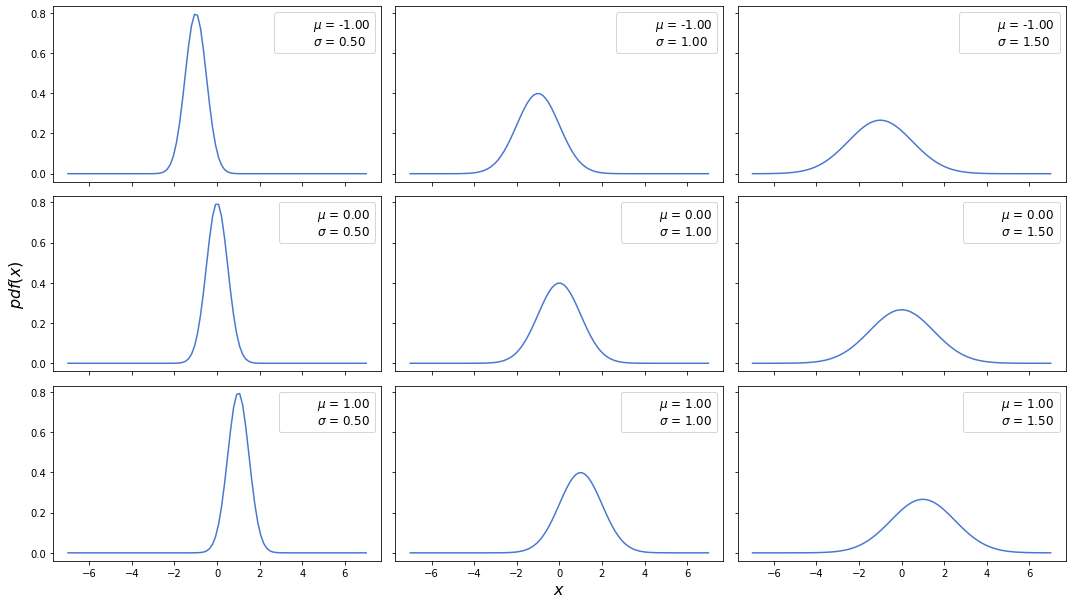

In [2]:
# Gaussian distribution present
mu_params, sd_params = [-1, 0, 1], [0.5, 1, 1.5]  # mean and std

x = np.linspace(-7, 7, 100)     # ??? effect on finance data

f, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True, sharey=True)
f.set_size_inches(15, 8.5)

for i in range(3):
    for j in range(3):
        mu, sd = mu_params[i], sd_params[j]
        y = stats.norm(mu, sd).pdf(x)

        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label=f"$\\mu$ = {mu:3.2f}\n$\\sigma$ = {sd:3.2f}", alpha=0)
        ax[i,j].legend(fontsize=12)

ax[2,1].set_xlabel('$x$', fontsize=16)
ax[1,0].set_ylabel('$pdf(x)$', fontsize=16)
plt.tight_layout()

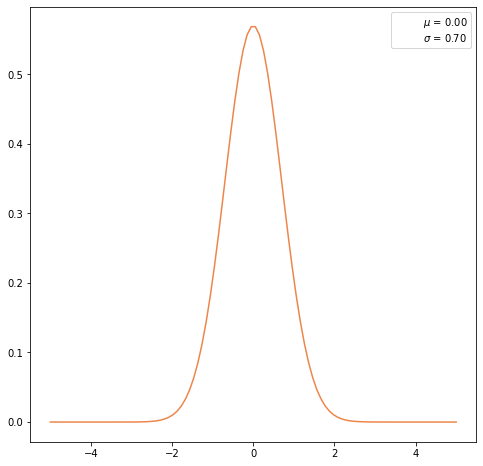

In [3]:
# self test
mu, sd = 0, 0.7

x = np.linspace(-5, 5, 100)

y = stats.norm(mu, sd ).pdf(x)
plt.figure(figsize=(8, 8))
plt.plot(0, 0, label=f"$\\mu$ = {mu:3.2f}\n$\\sigma$ = {sd:3.2f}", alpha=0)
plt.legend()
plt.plot(x, y)

Text(0, 0.5, '$CO_2 (ppmv)$')

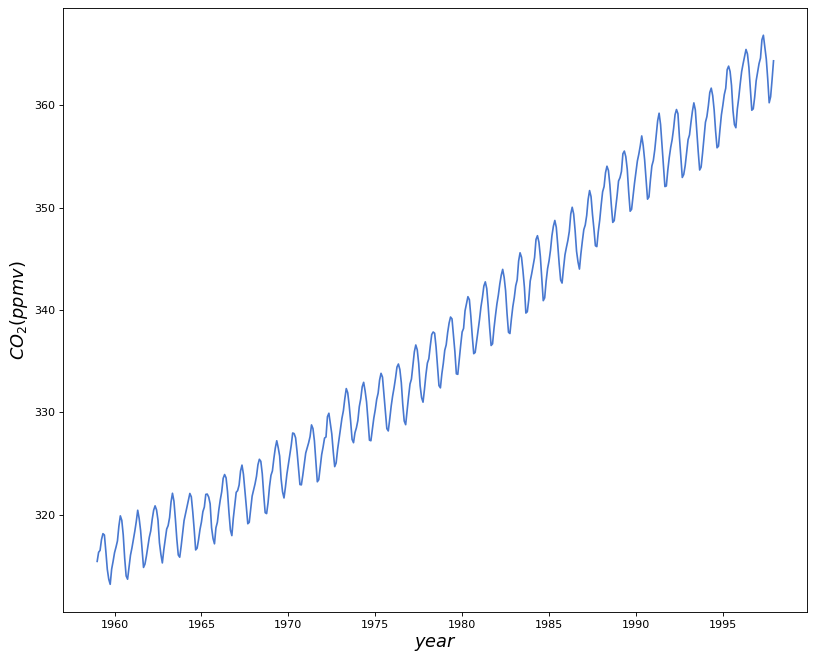

In [4]:
data = np.genfromtxt('mauna_loa_CO2.csv', delimiter=',')

plt.figure(figsize=(12, 10), dpi=80)
plt.plot(data[:,0], data[:,1])      # col1 and col2
plt.xlabel('$year$', fontsize=16)
plt.ylabel('$CO_2 (ppmv)$', fontsize=16)

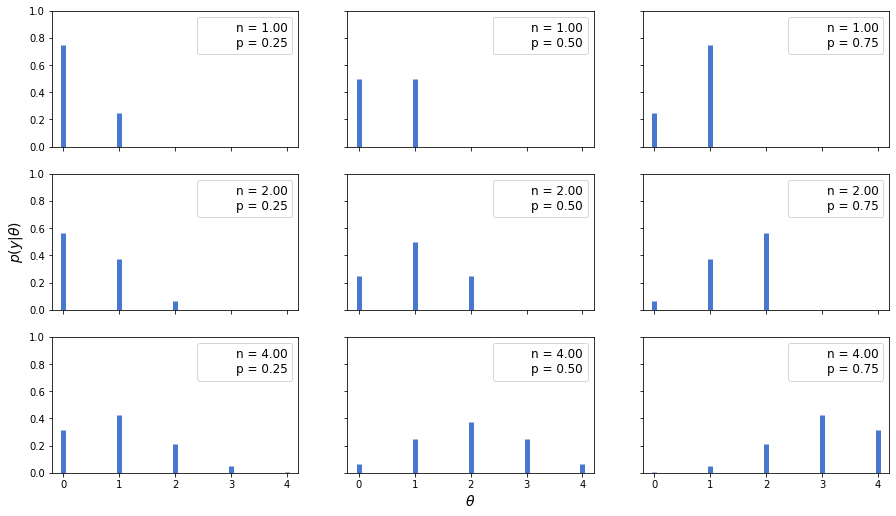

In [5]:
# Choosing the likelihood step
# discrete distribution returning the probability of getting y heads
n_params, p_params = [1, 2, 4],  [0.25, 0.5, 0.75]    # mean and std

x = np.arange(0, max(n_params)+1)

f, ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True)
f.set_size_inches(15, 8.5)

for i in range(3):
    for j in range(3):
        n, p = n_params[i], p_params[j]
        y = stats.binom(n=n, p=p).pmf(x)

        ax[i, j].vlines(x, 0, y, colors='b', lw=5)
        ax[i, j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label=f"n = {n:3.2f}\np = {p:3.2f}", alpha=0)
        ax[i, j].legend(fontsize=12)

ax[2, 1].set_xlabel('$\\theta$', fontsize=14)
ax[1, 0].set_ylabel('$p(y|\\theta)$', fontsize=14)
ax[0, 0].set_xticks(x)

Text(0, 0.5, '$p(\\theta)$')

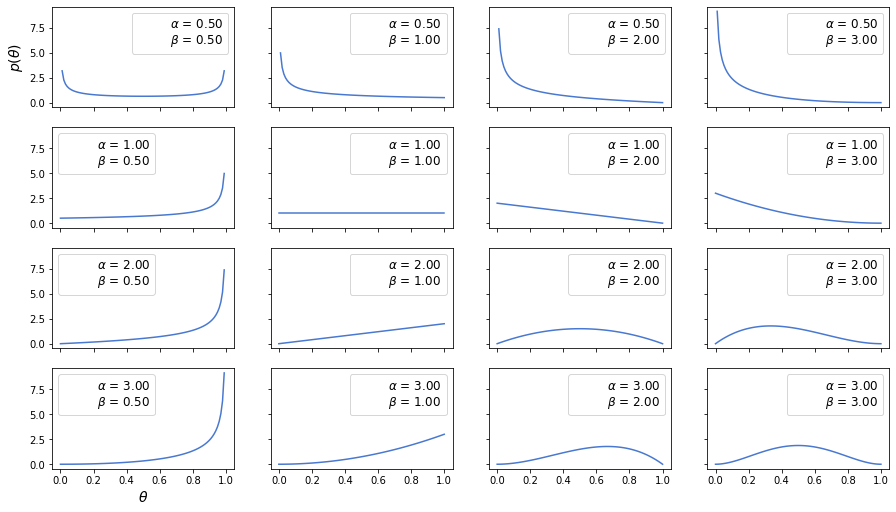

In [6]:
# Choosing the prior
# beta distribution
params = [0.5, 1, 2, 3]

x = np.linspace(0, 1, 100)

f, ax = plt.subplots(len(params), len(params), sharex=True,  sharey=True)
f.set_size_inches(15, 8.5)

for i in range(4):
    for j in range(4):
        a, b = params[i], params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(a, b), alpha=0)
        ax[i,j].legend(fontsize=12)

ax[3,0].set_xlabel('$\\theta$', fontsize=14)
ax[0,0].set_ylabel('$p(\\theta)$', fontsize=14)

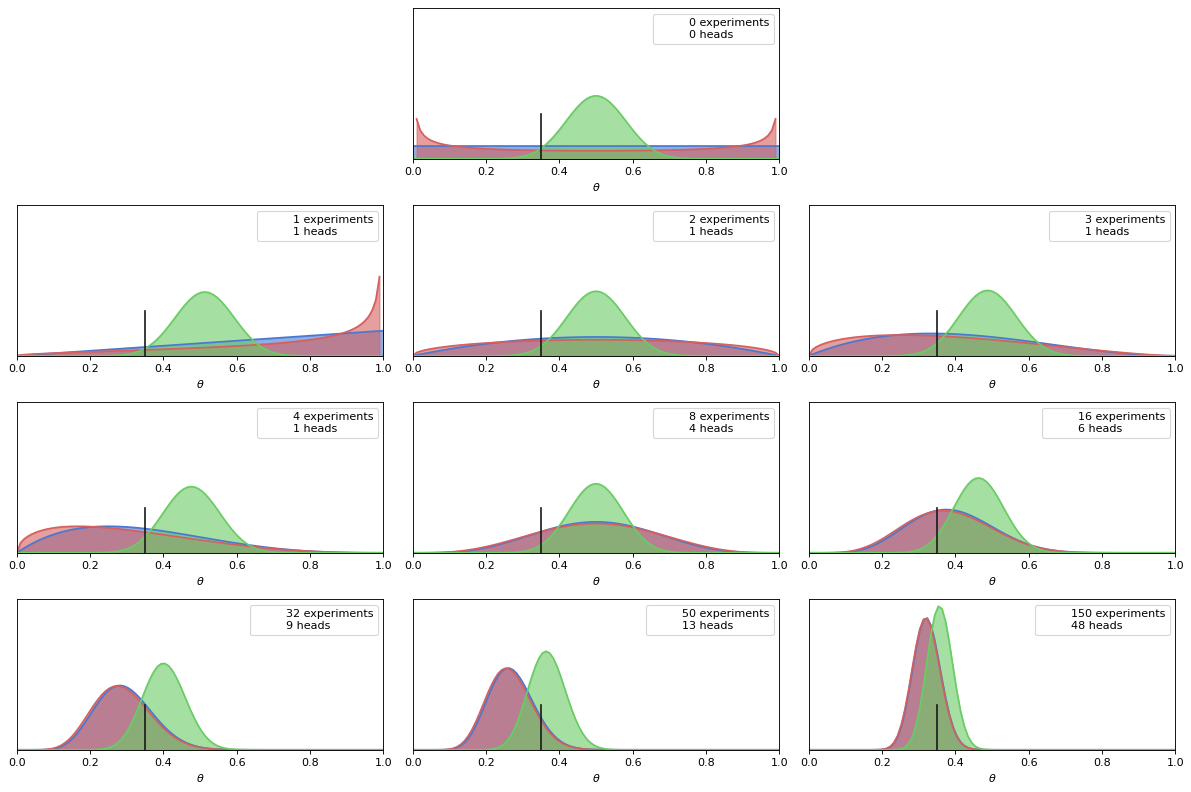

In [7]:
# Computing and plotting the posterior
theta_real = 0.35

trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = stats.beta

x = np.linspace(0, 1, 100)

plt.figure(figsize=(15, 10), dpi=80)
for idx, N in enumerate(trials):
    # cause we have 10 charts
    if idx == 0:    
        plt.subplot(4, 3, 2)
    else:
        plt.subplot(4, 3, idx+3)

    y = data[idx]
    for (a_prior, b_prior), c in zip(beta_params, ('b', 'r', 'g')):
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)

        plt.plot(x, p_theta_given_y, c)
        plt.fill_between(x, 0, p_theta_given_y, color=c, alpha=0.6)

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label="{:d} experiments\n{:d} heads".format(N, y), alpha=0)
    
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.xlabel(r"$\theta$")
    plt.legend()
    plt.gca().axes.get_yaxis().set_visible(False)
    
plt.tight_layout()

(0.0, 1.0)

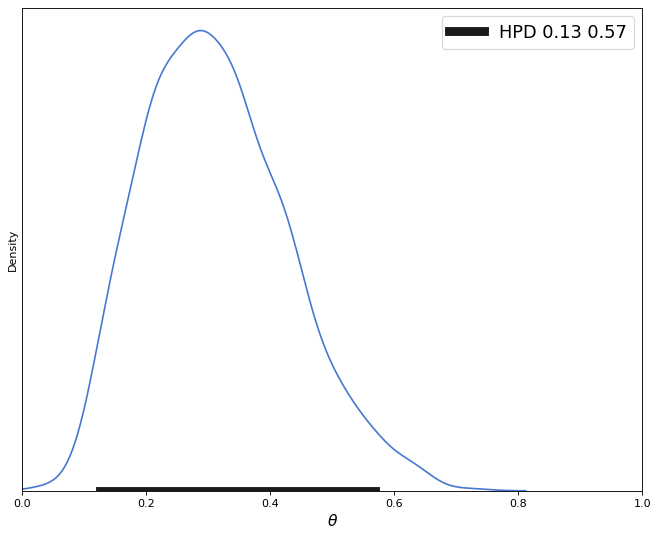

In [8]:
# simple Highest posterior density
def naive_hpd(post):
    sns.kdeplot(post)
    HPD = np.percentile(post, [2.5, 97.5])
    # black bold line
    plt.plot(HPD, [0, 0], label='HPD {:.2f} {:.2f}'.format(
        *HPD), linewidth=8, color='k')
    plt.legend(fontsize=16)
    plt.xlabel(r"$\theta$", fontsize=14)
    plt.gca().axes.get_yaxis().set_ticks([])


np.random.seed(1)
plt.figure(figsize=(10, 8), dpi=80)
post = stats.beta.rvs(5, 11, size=1000)
naive_hpd(post)
plt.xlim(0, 1)

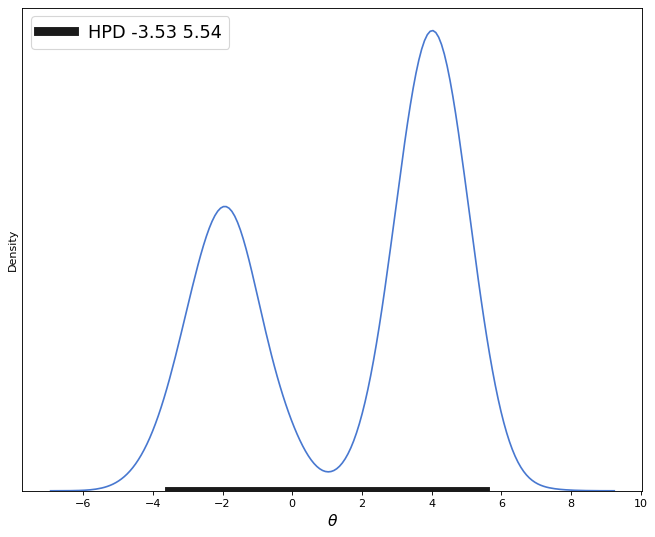

In [9]:
# mixture of Gaussians of a multi-modal distribution
np.random.seed(1)    
plt.figure(figsize=(10, 8), dpi=80)
gauss_a = stats.norm.rvs(loc=4, scale=0.9, size=3000)
gauss_b = stats.norm.rvs(loc=-2, scale=1, size=2000)

mix_norm = np.concatenate((gauss_a, gauss_b))

naive_hpd(mix_norm)